# Data Structures Course 
Shiraz University, Fall 2024    
Reza Rezazadegan   
[www.dreamintelligent.com](www.dreamintelligent.com) 

# 10- Depth First Search and Topological Sort

Depth First Search (DFS) is another method for traversing the nodes of a grap, starting from a source node $s$. Unlike BFS, which, at each iteration, finds the nodes with the same distance to $s$, DFS starts from $s$ and goes as far in the graph as possible and then repeats this process. As a consequence, DFS does not give us shortest paths or distances. Howver it can tell us which nodes are reachable from which nodes. 

Note that a traversal algorithm on a graph gives us an order on the set of nodes of the graph, i.e. the order the nodes are visited. If $s$ is the source node for traversal then:

- In BFS $d(s,u)<d(s,v)$ implies that  $v$ is visited after $u$.
- In DFS  if $u\in Adj(v)$ and $v$ is before $u$ in the list of vertices then  $u$ is before $v$ in the order. 



In [2]:
def dfs(Adj, s, parent = None, order = None):  # Adj: adjacency list, s: start
    
    if parent is None:                   # O(1) initialize parent list
        parent = [None for v in Adj]     # O(V) (use hash if unlabeled)
        parent[s] = s                    # O(1) root
        order = []                       # O(1) initialize order array
    
    for v in Adj[s]:                     # O(Adj[s]) loop over neighbors
        if parent[v] is None:            # O(1) parent not yet assigned
            parent[v] = s                # O(1) assign parent
            dfs(Adj, v, parent, order)   # Recursive call
    
    order.append(s)                      # O(1) amortized
    return parent, order

**Exercise:** what does DFS return for a linear graph $u_1 - u_2 - \cdots - u_{n_1} - u_n$? What about the cyclic graph which is obtained from the linear graph by adding an edge between $u_1$ and $u_{n-1}$?

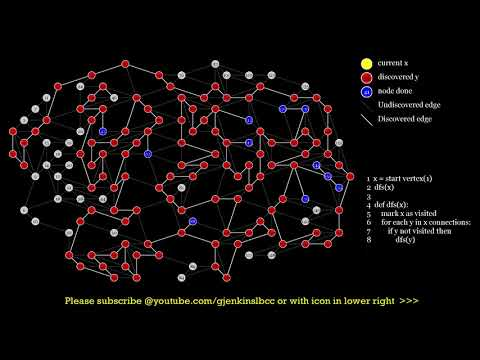

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('NUgMa5coCoE')

In [3]:
G=[ [2,1], [2,0,3], [1,3,0], [1,2] ]

parents, order=dfs(G, 0)
print(parents)
print(order)

[0, 2, 0, 1]
[3, 1, 2, 0]


## Compuational complexity
DFS is called on each vertex at most once. Further, the amount of work done by each recursive search 
from vertex v is proportional to the out-degree $deg^+(v)$ of v. Thus, the amount of work done by 
depth-first search is $O(\sum_v deg(v))$ = O(|E|).    
Because the parent array returned has length |V|, depth-first search runs in O(|V | + |E|) time. 


## Connected components of a graph

If $G$ is a graph and we consider the relation $u\sim v$ which is "there is a path in $G$ from $u$ to $v$", then we can easily see that this is an equivalence relation (i.e. it is symmetric and transitive). Thus it partitions the nodes of the graph into equivalence relations which we call **connected components**. Each two nodes in the same connected component can be connected by a path and if $u, v$ are in different connected components then there is no path in $G$ connecting them. 

The **Full-DFS** algorithm runs DFS starting from a (randomly chosen) vertex then repeats this process with a vertex that has not been encountered, untill all the vertices are encontered. This way the connected components of the graph are found. 

In [ ]:
def full_dfs(Adj):               # Adj: adjacency list
    parent = [None for v in Adj] # O(V) (use hash if unlabeled)
    order = []                   # O(1) initialize order list
    for v in range(len(Adj)):    # O(V) loop over vertices
        if parent[v] is None:    # O(1) parent not yet assigned
            parent[v] = v        # O(1) assign self as parent (a root)
            dfs(Adj, v, parent, order) # DFS from v (BFS can also be used)
    return parent, order


Just like  BFS, DFS also determines a subtree of $G$ using the `parent` list. 

**Exercise:** run the code for `DFS` for the graph $G$ above. 

**Exercise:** The Krackhart kite graph is given below. 
1) First write the adjacency list for this graph.   
2) Do the BFS (returning distances and parents), and DFS (returning the order and the parents), once for 3 and once for 5.   
3) Also find the subtrees induced in each case. 
4) Determine the shortest path from 3 to 8 and 5 to 4, obtained from BFS.

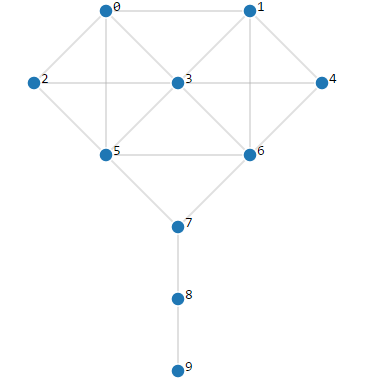


**Exercise:** recall the maze problem from the chapter on stacks. A maze can be converted into a graph as follows. The vertices of the graph are the non-wall cells of the maze and two nodes are connected if they are neighbors (up, dowsn, left or right). This graph has two designated nodes: the starts $S$ and the finish $F$. 
1) What is DFS (starting from $S$) for this graph?
2) What is BFS (starting from $S$) for this graph? 
3) Run the two algorithms by hand for the following maze. 
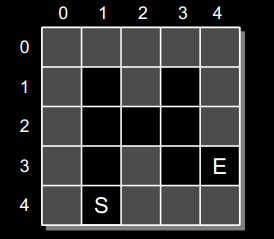

**Exercise:** Describe a graph on n vertices for which BFS and DFS would first visit vertices in the 
same order. 

# Topological sort
## Directed acyclic graphs (DAGs)
A DAG is a directed graph that contains no _directed cycles_, i.e. we cannot visit the same vertex twice by following the arrows. 
Examples of DAGs include citation networks and dependency graphs. 

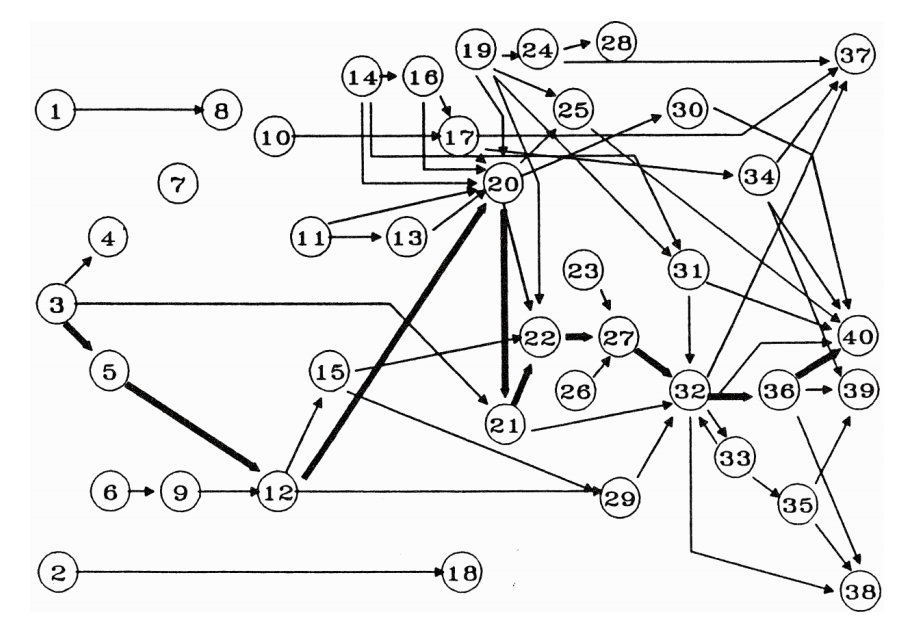

The citation network of the papers leading to the discovery of DNA (from Hummon and Doreian, Connectivity in a citation network: The development of DNA theory, Social Networks, 1989)




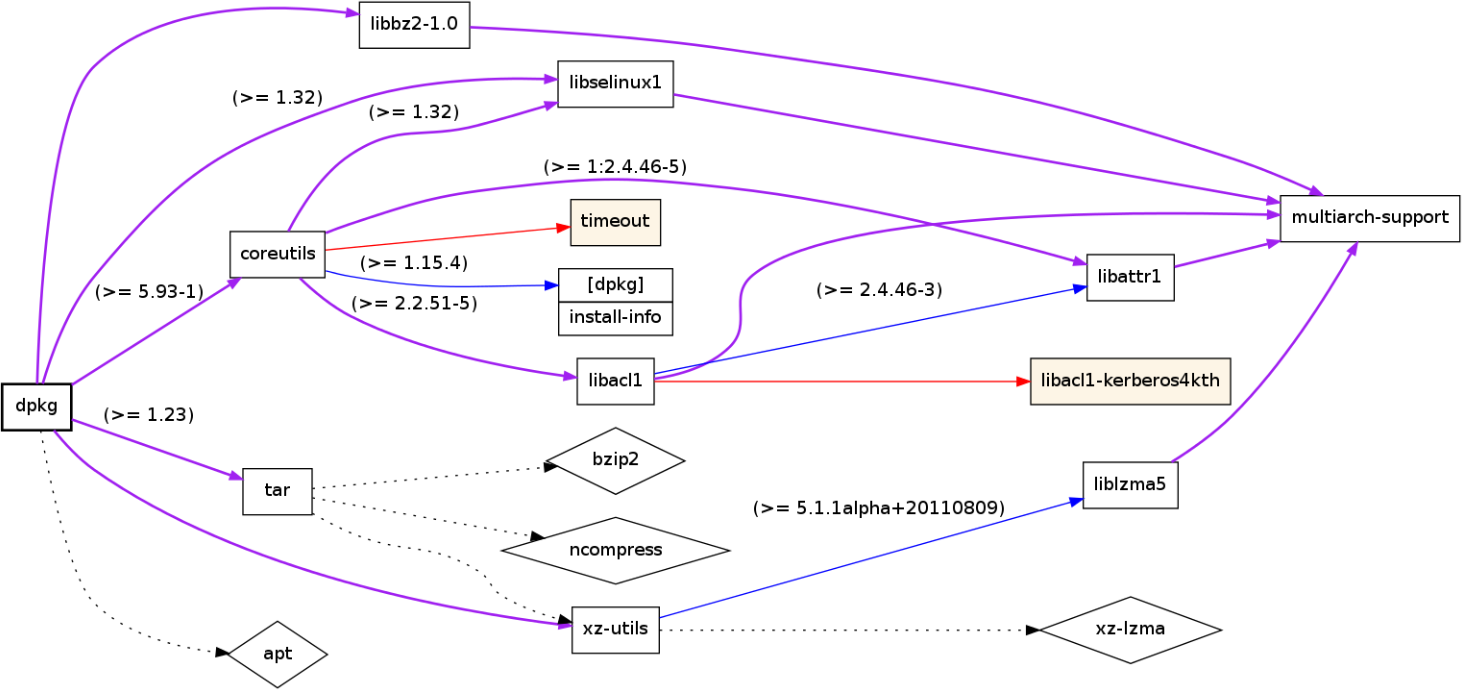
Dependency graph of the Linux package `dpkg`; produced using `debtree`. (Consider only the blue arrows.) If we want to install `dpkg`, in what order should we install its dependencies? Note: for the purpose of the current discussion, the arrows in the above diagram should be reversed. 

## Topological order
In a DAG we can obtain an order (hierarchy) on the nodes, which is called a **topological order**: for each directed edge $(u, v)$ in $G$, the vertex $u$ appears before vertex $v$ in the topological order.

Such an order can be obtained using **Kahn's algorithm** as follows.

- The zeroth layer $L_0$ of the order consists of nodes that do not receive any incoming edges, i.e. whose in-degree is zero. (Why do they exist?)
- Recursively, after determining the nodes in the $i$'th layer $L_i$, the $(i+1)$'th layer consists of nodes that _all_ whose incoming edges are from the nodes in layers $L_0, L_1,\ldots, L_i$. 

For example for the simple DAG with 3 nodes $u,v,w$ and edges $u\to v, v \to w and u\to w$, the topological order is given by $u<v, v<w, u<w$ and Kahn's algorithm gives $L_0=\{u\}, L_1=\{v\}, L_2=\{w\}$. 


**Exercise:** Show that there are no edges between the nodes in the same layer.  


**Exercise:** Implement topological sort, i.e. a function that receives an adjacency list and returns the layers in the topological order. 

## DFS in directed graphs
In a directed graph, Full-DFS has to follow the direction of the edges. Thus, in a DAG starting from any node, it reaches other nodes in the order of the topological sort, i.e. if $(u,v)\in E$ then $v$ is visited before $u$. Since there are no directed cycles in a DAG, and the DFS order is the referve of the order in which nodes are visited, in such a graph DFS order is the reverse of the topological order.

**Exercise:** Perform the topological sort and DFS for the linear directed graph $u_1\to u_2\to\cdots\to u_n$


**Exercise:** Perform the topological sort and DFS for the DNA citation network and (the reverse of) `dpkg` dependency graph. 

However if the directed graph is not cyclic, DFS visiting order and topological order will not coincide.

### How to find the cycles in a directed graph?
When running DFS, if we encounter a node twice, this means that there is a cycle in the grpah.  
Conversely if there is a cycle $u_0, u_1, \ldots, u_k, u_0$ in the graph, and (without loss of generality) $u_0$ is the first node in the graph visited by DFS, then DFS may go out of this cycle, say at a node $u_i$ but it always comes back to $u_i$. Thus after some time it reaches $v_k$. Since there is an edge $(u_k, u_0)$, DFS visits $u_0$ again after visiting $u_k$.

